In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
# dataset directory
my_data_dir = '../data/face_detection/faces/'

In [19]:
train_path = my_data_dir

In [18]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['coordinates.txt', 'neg_train', 'pos_train']

# Plot example of  Face possitive

In [15]:
os.listdir(my_data_dir+'/pos_train')[0]

'1.bmp'

In [45]:
test_face= train_path+'pos_train'+'/30.bmp'

In [46]:
face_img = imread(test_face)

In [47]:
face_img.shape

(12, 12, 3)

Text(0.5, 1.0, 'face example')

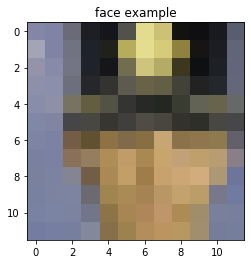

In [53]:
plt.imshow(face_img)
plt.title('face example')

# Plot example of  Face negative

In [49]:
os.listdir(my_data_dir+'/neg_train')[0]

'1.bmp'

In [50]:
test_neg_face= train_path+'neg_train'+'/30.bmp'
non_face_img = imread(test_neg_face)
non_face_img.shape

(12, 12, 3)

Text(0.5, 1.0, 'Non face example')

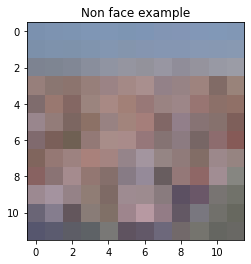

In [54]:
plt.imshow(non_face_img)
plt.title('Non face example')

In [57]:
len(os.listdir(train_path+'/pos_train'))

48026

In [58]:
len(os.listdir(train_path+'/neg_train'))

40784

# Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [62]:
image_gen = ImageDataGenerator(rotation_range=45, # rotate the image 45 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 5%
                               #height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               #zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               #vertical_flip==True, #allow mirror imaging
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split = 0.2
                               )

Text(0.5, 1.0, 'face example with ogmentation')

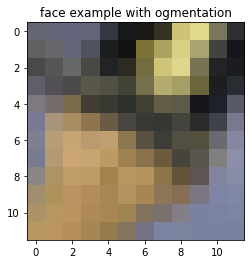

In [65]:
plt.imshow(image_gen.random_transform(face_img))
plt.title('face example with ogmentation')